# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 2:
Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Example of Image 3:
Image - Min Value: 4 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship


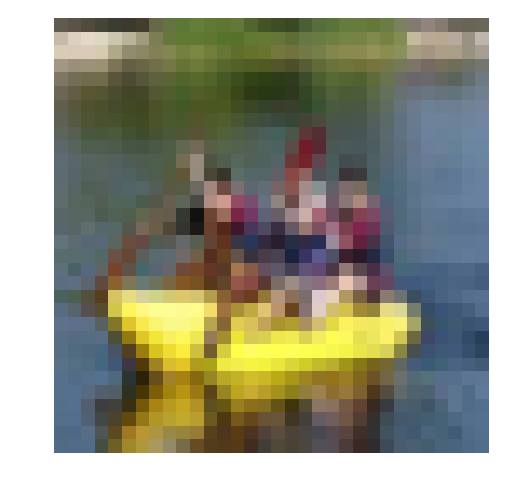

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 2
sample_id = 3
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    y = np.array([i / 255. for i in x])
    return y


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
from sklearn import preprocessing

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    lb = preprocessing.LabelBinarizer()
    lb.fit(range(10))
    y = lb.transform(x)
    return y


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    s = tuple([None]+list(image_shape))
    return tf.placeholder(tf.float32, shape=s, name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape=(None,n_classes), name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [8]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    
    padding_type = 'SAME'
    
    # Fetching input depth
    input_depth = int(x_tensor.shape[3])
    
    # Setting up filter/kernel dimensions
    f = tuple(list(conv_ksize)+[input_depth, conv_num_outputs])
    
    # Setting up stride parameters
    s = tuple([1]+list(conv_strides)+[1])
    
    # Setting up padding parameters
    pk = tuple([1]+list(pool_ksize)+[1])
    ps = tuple([1]+list(pool_strides)+[1])
    
    # ---
    
    # Defining weights and bias 
    weights = tf.Variable(tf.random_normal(f))
    bias = tf.Variable(tf.zeros(conv_num_outputs))
    
    # Applying convolution and non-linearity
    layer = tf.nn.conv2d(input=x_tensor, filter=weights, strides=s, padding=padding_type) + bias
    layer = tf.nn.relu(layer)
    
    # Max-pooling
    y_tensor = tf.nn.max_pool(value=layer, padding=padding_type, ksize=pk, strides=ps)
    
    return y_tensor 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [9]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    
    # Computing flattened image size
    i = x_tensor.shape[1:]
    o = int(i[0]) * int(i[1]) * int(i[2])
    
    # Reshaping tensor
    y_tensor = tf.reshape(tensor=x_tensor, shape=(-1, o))
    
    return y_tensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [10]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    
    # Fetching input size
    i = int(x_tensor.get_shape()[1])

    # Defining weights and bias 
    weights = tf.Variable(tf.random_normal([i,num_outputs]))
    bias = tf.Variable(tf.zeros(num_outputs))
    
    # Computing fully connected layer
    layer = tf.add(tf.matmul(x_tensor, weights), bias)
    
    # Applying non-linear activation
    y_tensor = tf.nn.relu(layer)
    
    return y_tensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [11]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    
    # Fetching input size
    i = int(x_tensor.get_shape()[1])

    # Defining weights and bias 
    weights = tf.Variable(tf.random_normal([i,num_outputs]))
    bias = tf.Variable(tf.zeros(num_outputs))
    
    # Computing fully connected layer
    y_tensor = tf.add(tf.matmul(x_tensor, weights), bias)
        
    return y_tensor

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [12]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    c = conv2d_maxpool(
            x_tensor=x, 
            conv_num_outputs=20, conv_ksize=(5,5), conv_strides=(1,1), 
            pool_ksize=(2,2), pool_strides=(2,2)
        )
    
    # Dropout
    c = tf.nn.dropout(c, keep_prob)
    
    """
    c = conv2d_maxpool(
            x_tensor=x, 
            conv_num_outputs=16, conv_ksize=(4,4), conv_strides=(1,1), 
            pool_ksize=(4,4), pool_strides=(1,1)
        )
    """
    
    # Dropout
    #c = tf.nn.dropout(c, keep_prob)
    
    """
    c = conv2d_maxpool(
            x_tensor=c, 
            conv_num_outputs=16, conv_ksize=(4,4), conv_strides=(2,2), 
            pool_ksize=(4,4), pool_strides=(2,2)
        )
    """
    
    

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    f = flatten(x_tensor=c)
    

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    l = fully_conn(x_tensor=f, num_outputs=256)
    #l = fully_conn(x_tensor=l, num_outputs=32)
    #l = fully_conn(x_tensor=l, num_outputs=16)
     
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    o = output(x_tensor=l, num_outputs=10)
    
    # TODO: return output
    return o


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [13]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    
    session.run(optimizer, feed_dict={x:feature_batch, y:label_batch, keep_prob:keep_probability})
    
    pass


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [14]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    c = session.run(cost, feed_dict={x:feature_batch, y:label_batch, keep_prob:1.0})
    a = session.run(accuracy, feed_dict={x:valid_features, y:valid_labels, keep_prob:1.0})
    print('   Loss:  {:>10.4f}  |  Validation Accuracy:  {:.6f}'.format(c,a))
    pass

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [15]:
# TODO: Tune Parameters
epochs = 1000
batch_size = 1024
keep_probability = 0.95

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...


KeyboardInterrupt: 

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:     Loss:   1791.3883  |  Validation Accuracy:  0.127200
Epoch  1, CIFAR-10 Batch 2:     Loss:   1449.4103  |  Validation Accuracy:  0.165800
Epoch  1, CIFAR-10 Batch 3:     Loss:   1289.1154  |  Validation Accuracy:  0.182000
Epoch  1, CIFAR-10 Batch 4:     Loss:   1035.8042  |  Validation Accuracy:  0.188200
Epoch  1, CIFAR-10 Batch 5:     Loss:    948.4077  |  Validation Accuracy:  0.209400
Epoch  2, CIFAR-10 Batch 1:     Loss:    863.3269  |  Validation Accuracy:  0.216000
Epoch  2, CIFAR-10 Batch 2:     Loss:    815.7554  |  Validation Accuracy:  0.223200
Epoch  2, CIFAR-10 Batch 3:     Loss:    760.6809  |  Validation Accuracy:  0.228400
Epoch  2, CIFAR-10 Batch 4:     Loss:    664.5956  |  Validation Accuracy:  0.238800
Epoch  2, CIFAR-10 Batch 5:     Loss:    679.9218  |  Validation Accuracy:  0.242600
Epoch  3, CIFAR-10 Batch 1:     Loss:    622.5903  |  Validation Accuracy:  0.252400
Epoch  3, CIFAR-10 Batch 2:     Loss:    597.7991  | 

Epoch 20, CIFAR-10 Batch 2:     Loss:      2.5680  |  Validation Accuracy:  0.101400
Epoch 20, CIFAR-10 Batch 3:     Loss:      2.5482  |  Validation Accuracy:  0.101400
Epoch 20, CIFAR-10 Batch 4:     Loss:      2.4269  |  Validation Accuracy:  0.101800
Epoch 20, CIFAR-10 Batch 5:     Loss:      2.5078  |  Validation Accuracy:  0.102000
Epoch 21, CIFAR-10 Batch 1:     Loss:      2.8182  |  Validation Accuracy:  0.102000
Epoch 21, CIFAR-10 Batch 2:     Loss:      2.5239  |  Validation Accuracy:  0.102000
Epoch 21, CIFAR-10 Batch 3:     Loss:      2.5019  |  Validation Accuracy:  0.102000
Epoch 21, CIFAR-10 Batch 4:     Loss:      2.4053  |  Validation Accuracy:  0.097400
Epoch 21, CIFAR-10 Batch 5:     Loss:      2.4680  |  Validation Accuracy:  0.097400
Epoch 22, CIFAR-10 Batch 1:     Loss:      2.7607  |  Validation Accuracy:  0.097600
Epoch 22, CIFAR-10 Batch 2:     Loss:      2.4978  |  Validation Accuracy:  0.097600
Epoch 22, CIFAR-10 Batch 3:     Loss:      2.4685  |  Validation 

Epoch 39, CIFAR-10 Batch 4:     Loss:      2.2969  |  Validation Accuracy:  0.095000
Epoch 39, CIFAR-10 Batch 5:     Loss:      2.3134  |  Validation Accuracy:  0.095000
Epoch 40, CIFAR-10 Batch 1:     Loss:      2.2961  |  Validation Accuracy:  0.095000
Epoch 40, CIFAR-10 Batch 2:     Loss:      2.3261  |  Validation Accuracy:  0.095000
Epoch 40, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.095000
Epoch 40, CIFAR-10 Batch 4:     Loss:      2.2969  |  Validation Accuracy:  0.095000
Epoch 40, CIFAR-10 Batch 5:     Loss:      2.3122  |  Validation Accuracy:  0.095000
Epoch 41, CIFAR-10 Batch 1:     Loss:      2.2953  |  Validation Accuracy:  0.095000
Epoch 41, CIFAR-10 Batch 2:     Loss:      2.3249  |  Validation Accuracy:  0.095000
Epoch 41, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.095000
Epoch 41, CIFAR-10 Batch 4:     Loss:      2.2969  |  Validation Accuracy:  0.095000
Epoch 41, CIFAR-10 Batch 5:     Loss:      2.3108  |  Validation 

Epoch 59, CIFAR-10 Batch 1:     Loss:      2.2952  |  Validation Accuracy:  0.094600
Epoch 59, CIFAR-10 Batch 2:     Loss:      2.2995  |  Validation Accuracy:  0.094600
Epoch 59, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094600
Epoch 59, CIFAR-10 Batch 4:     Loss:      2.2998  |  Validation Accuracy:  0.094600
Epoch 59, CIFAR-10 Batch 5:     Loss:      2.3025  |  Validation Accuracy:  0.094600
Epoch 60, CIFAR-10 Batch 1:     Loss:      2.2952  |  Validation Accuracy:  0.094600
Epoch 60, CIFAR-10 Batch 2:     Loss:      2.2995  |  Validation Accuracy:  0.094600
Epoch 60, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094600
Epoch 60, CIFAR-10 Batch 4:     Loss:      2.2998  |  Validation Accuracy:  0.094600
Epoch 60, CIFAR-10 Batch 5:     Loss:      2.3025  |  Validation Accuracy:  0.094600
Epoch 61, CIFAR-10 Batch 1:     Loss:      2.2951  |  Validation Accuracy:  0.094600
Epoch 61, CIFAR-10 Batch 2:     Loss:      2.2995  |  Validation 

Epoch 78, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 78, CIFAR-10 Batch 4:     Loss:      2.2999  |  Validation Accuracy:  0.094400
Epoch 78, CIFAR-10 Batch 5:     Loss:      2.3025  |  Validation Accuracy:  0.094600
Epoch 79, CIFAR-10 Batch 1:     Loss:      2.2949  |  Validation Accuracy:  0.094600
Epoch 79, CIFAR-10 Batch 2:     Loss:      2.2996  |  Validation Accuracy:  0.094600
Epoch 79, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094600
Epoch 79, CIFAR-10 Batch 4:     Loss:      2.2999  |  Validation Accuracy:  0.094400
Epoch 79, CIFAR-10 Batch 5:     Loss:      2.3025  |  Validation Accuracy:  0.094400
Epoch 80, CIFAR-10 Batch 1:     Loss:      2.2948  |  Validation Accuracy:  0.094400
Epoch 80, CIFAR-10 Batch 2:     Loss:      2.2996  |  Validation Accuracy:  0.094400
Epoch 80, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 80, CIFAR-10 Batch 4:     Loss:      2.2999  |  Validation 

Epoch 97, CIFAR-10 Batch 5:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 98, CIFAR-10 Batch 1:     Loss:      2.2947  |  Validation Accuracy:  0.094400
Epoch 98, CIFAR-10 Batch 2:     Loss:      2.2966  |  Validation Accuracy:  0.094400
Epoch 98, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 98, CIFAR-10 Batch 4:     Loss:      2.2999  |  Validation Accuracy:  0.094400
Epoch 98, CIFAR-10 Batch 5:     Loss:      2.3025  |  Validation Accuracy:  0.094400
Epoch 99, CIFAR-10 Batch 1:     Loss:      2.2947  |  Validation Accuracy:  0.094400
Epoch 99, CIFAR-10 Batch 2:     Loss:      2.2966  |  Validation Accuracy:  0.094400
Epoch 99, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 99, CIFAR-10 Batch 4:     Loss:      2.2999  |  Validation Accuracy:  0.094400
Epoch 99, CIFAR-10 Batch 5:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 100, CIFAR-10 Batch 1:     Loss:      2.2946  |  Validation

Epoch 117, CIFAR-10 Batch 1:     Loss:      2.2945  |  Validation Accuracy:  0.094400
Epoch 117, CIFAR-10 Batch 2:     Loss:      2.2979  |  Validation Accuracy:  0.094400
Epoch 117, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 117, CIFAR-10 Batch 4:     Loss:      2.3000  |  Validation Accuracy:  0.094400
Epoch 117, CIFAR-10 Batch 5:     Loss:      2.3025  |  Validation Accuracy:  0.094400
Epoch 118, CIFAR-10 Batch 1:     Loss:      2.2943  |  Validation Accuracy:  0.094400
Epoch 118, CIFAR-10 Batch 2:     Loss:      2.2979  |  Validation Accuracy:  0.094400
Epoch 118, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 118, CIFAR-10 Batch 4:     Loss:      2.3000  |  Validation Accuracy:  0.094400
Epoch 118, CIFAR-10 Batch 5:     Loss:      2.3025  |  Validation Accuracy:  0.094400
Epoch 119, CIFAR-10 Batch 1:     Loss:      2.2943  |  Validation Accuracy:  0.094400
Epoch 119, CIFAR-10 Batch 2:     Loss:      2.2974  | 

Epoch 136, CIFAR-10 Batch 1:     Loss:      2.2945  |  Validation Accuracy:  0.094400
Epoch 136, CIFAR-10 Batch 2:     Loss:      2.2994  |  Validation Accuracy:  0.094400
Epoch 136, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 136, CIFAR-10 Batch 4:     Loss:      2.2999  |  Validation Accuracy:  0.094400
Epoch 136, CIFAR-10 Batch 5:     Loss:      2.3025  |  Validation Accuracy:  0.094400
Epoch 137, CIFAR-10 Batch 1:     Loss:      2.2936  |  Validation Accuracy:  0.094400
Epoch 137, CIFAR-10 Batch 2:     Loss:      2.2994  |  Validation Accuracy:  0.094400
Epoch 137, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 137, CIFAR-10 Batch 4:     Loss:      2.2999  |  Validation Accuracy:  0.094400
Epoch 137, CIFAR-10 Batch 5:     Loss:      2.3025  |  Validation Accuracy:  0.094400
Epoch 138, CIFAR-10 Batch 1:     Loss:      2.2945  |  Validation Accuracy:  0.094400
Epoch 138, CIFAR-10 Batch 2:     Loss:      2.2994  | 

Epoch 155, CIFAR-10 Batch 1:     Loss:      2.2953  |  Validation Accuracy:  0.094400
Epoch 155, CIFAR-10 Batch 2:     Loss:      2.2966  |  Validation Accuracy:  0.094400
Epoch 155, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 155, CIFAR-10 Batch 4:     Loss:      2.3026  |  Validation Accuracy:  0.094400
Epoch 155, CIFAR-10 Batch 5:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 156, CIFAR-10 Batch 1:     Loss:      2.2948  |  Validation Accuracy:  0.094400
Epoch 156, CIFAR-10 Batch 2:     Loss:      2.2966  |  Validation Accuracy:  0.094400
Epoch 156, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 156, CIFAR-10 Batch 4:     Loss:      2.3013  |  Validation Accuracy:  0.094400
Epoch 156, CIFAR-10 Batch 5:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 157, CIFAR-10 Batch 1:     Loss:      2.2948  |  Validation Accuracy:  0.094400
Epoch 157, CIFAR-10 Batch 2:     Loss:      2.2966  | 

Epoch 174, CIFAR-10 Batch 1:     Loss:      2.2933  |  Validation Accuracy:  0.094400
Epoch 174, CIFAR-10 Batch 2:     Loss:      2.2994  |  Validation Accuracy:  0.094400
Epoch 174, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 174, CIFAR-10 Batch 4:     Loss:      2.3026  |  Validation Accuracy:  0.094400
Epoch 174, CIFAR-10 Batch 5:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 175, CIFAR-10 Batch 1:     Loss:      2.2921  |  Validation Accuracy:  0.094400
Epoch 175, CIFAR-10 Batch 2:     Loss:      2.2994  |  Validation Accuracy:  0.094400
Epoch 175, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 175, CIFAR-10 Batch 4:     Loss:      2.3026  |  Validation Accuracy:  0.094400
Epoch 175, CIFAR-10 Batch 5:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 176, CIFAR-10 Batch 1:     Loss:      2.2920  |  Validation Accuracy:  0.094400
Epoch 176, CIFAR-10 Batch 2:     Loss:      2.2994  | 

Epoch 193, CIFAR-10 Batch 1:     Loss:      2.2914  |  Validation Accuracy:  0.094400
Epoch 193, CIFAR-10 Batch 2:     Loss:      2.2965  |  Validation Accuracy:  0.094400
Epoch 193, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 193, CIFAR-10 Batch 4:     Loss:      2.3026  |  Validation Accuracy:  0.094400
Epoch 193, CIFAR-10 Batch 5:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 194, CIFAR-10 Batch 1:     Loss:      2.2916  |  Validation Accuracy:  0.094400
Epoch 194, CIFAR-10 Batch 2:     Loss:      2.2965  |  Validation Accuracy:  0.094400
Epoch 194, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 194, CIFAR-10 Batch 4:     Loss:      2.3026  |  Validation Accuracy:  0.094400
Epoch 194, CIFAR-10 Batch 5:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 195, CIFAR-10 Batch 1:     Loss:      2.2915  |  Validation Accuracy:  0.094400
Epoch 195, CIFAR-10 Batch 2:     Loss:      2.2966  | 

Epoch 212, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094400
Epoch 212, CIFAR-10 Batch 2:     Loss:      2.2965  |  Validation Accuracy:  0.094400
Epoch 212, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 212, CIFAR-10 Batch 4:     Loss:      2.3026  |  Validation Accuracy:  0.094400
Epoch 212, CIFAR-10 Batch 5:     Loss:      2.3019  |  Validation Accuracy:  0.094400
Epoch 213, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094400
Epoch 213, CIFAR-10 Batch 2:     Loss:      2.2965  |  Validation Accuracy:  0.094400
Epoch 213, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 213, CIFAR-10 Batch 4:     Loss:      2.3026  |  Validation Accuracy:  0.094400
Epoch 213, CIFAR-10 Batch 5:     Loss:      2.3022  |  Validation Accuracy:  0.094400
Epoch 214, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094400
Epoch 214, CIFAR-10 Batch 2:     Loss:      2.2965  | 

Epoch 231, CIFAR-10 Batch 1:     Loss:      2.2914  |  Validation Accuracy:  0.094600
Epoch 231, CIFAR-10 Batch 2:     Loss:      2.2956  |  Validation Accuracy:  0.094400
Epoch 231, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094400
Epoch 231, CIFAR-10 Batch 4:     Loss:      2.3026  |  Validation Accuracy:  0.094400
Epoch 231, CIFAR-10 Batch 5:     Loss:      2.3018  |  Validation Accuracy:  0.094400
Epoch 232, CIFAR-10 Batch 1:     Loss:      2.2915  |  Validation Accuracy:  0.094400
Epoch 232, CIFAR-10 Batch 2:     Loss:      2.2965  |  Validation Accuracy:  0.094600
Epoch 232, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094600
Epoch 232, CIFAR-10 Batch 4:     Loss:      2.3005  |  Validation Accuracy:  0.094600
Epoch 232, CIFAR-10 Batch 5:     Loss:      2.3008  |  Validation Accuracy:  0.094600
Epoch 233, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094600
Epoch 233, CIFAR-10 Batch 2:     Loss:      2.2965  | 

Epoch 250, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094400
Epoch 250, CIFAR-10 Batch 2:     Loss:      2.2952  |  Validation Accuracy:  0.094400
Epoch 250, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094600
Epoch 250, CIFAR-10 Batch 4:     Loss:      2.3002  |  Validation Accuracy:  0.094600
Epoch 250, CIFAR-10 Batch 5:     Loss:      2.2986  |  Validation Accuracy:  0.094600
Epoch 251, CIFAR-10 Batch 1:     Loss:      2.2914  |  Validation Accuracy:  0.094600
Epoch 251, CIFAR-10 Batch 2:     Loss:      2.2950  |  Validation Accuracy:  0.094600
Epoch 251, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094600
Epoch 251, CIFAR-10 Batch 4:     Loss:      2.3001  |  Validation Accuracy:  0.094600
Epoch 251, CIFAR-10 Batch 5:     Loss:      2.2984  |  Validation Accuracy:  0.094600
Epoch 252, CIFAR-10 Batch 1:     Loss:      2.2914  |  Validation Accuracy:  0.094600
Epoch 252, CIFAR-10 Batch 2:     Loss:      2.2949  | 

Epoch 269, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094800
Epoch 269, CIFAR-10 Batch 2:     Loss:      2.2950  |  Validation Accuracy:  0.094600
Epoch 269, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.094600
Epoch 269, CIFAR-10 Batch 4:     Loss:      2.3026  |  Validation Accuracy:  0.094600
Epoch 269, CIFAR-10 Batch 5:     Loss:      2.2963  |  Validation Accuracy:  0.094600
Epoch 270, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094600
Epoch 270, CIFAR-10 Batch 2:     Loss:      2.2949  |  Validation Accuracy:  0.094600
Epoch 270, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.094600
Epoch 270, CIFAR-10 Batch 4:     Loss:      2.2997  |  Validation Accuracy:  0.094600
Epoch 270, CIFAR-10 Batch 5:     Loss:      2.2985  |  Validation Accuracy:  0.094600
Epoch 271, CIFAR-10 Batch 1:     Loss:      2.2919  |  Validation Accuracy:  0.094600
Epoch 271, CIFAR-10 Batch 2:     Loss:      2.2965  | 

Epoch 288, CIFAR-10 Batch 1:     Loss:      2.2904  |  Validation Accuracy:  0.094800
Epoch 288, CIFAR-10 Batch 2:     Loss:      2.2950  |  Validation Accuracy:  0.094800
Epoch 288, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094600
Epoch 288, CIFAR-10 Batch 4:     Loss:      2.2997  |  Validation Accuracy:  0.094600
Epoch 288, CIFAR-10 Batch 5:     Loss:      2.2988  |  Validation Accuracy:  0.094600
Epoch 289, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094600
Epoch 289, CIFAR-10 Batch 2:     Loss:      2.2950  |  Validation Accuracy:  0.094600
Epoch 289, CIFAR-10 Batch 3:     Loss:      2.3024  |  Validation Accuracy:  0.094800
Epoch 289, CIFAR-10 Batch 4:     Loss:      2.2997  |  Validation Accuracy:  0.094800
Epoch 289, CIFAR-10 Batch 5:     Loss:      2.2983  |  Validation Accuracy:  0.094800
Epoch 290, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094800
Epoch 290, CIFAR-10 Batch 2:     Loss:      2.2950  | 

Epoch 307, CIFAR-10 Batch 1:     Loss:      2.2941  |  Validation Accuracy:  0.094600
Epoch 307, CIFAR-10 Batch 2:     Loss:      2.2949  |  Validation Accuracy:  0.094600
Epoch 307, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.094600
Epoch 307, CIFAR-10 Batch 4:     Loss:      2.2959  |  Validation Accuracy:  0.094600
Epoch 307, CIFAR-10 Batch 5:     Loss:      2.2938  |  Validation Accuracy:  0.094600
Epoch 308, CIFAR-10 Batch 1:     Loss:      2.2941  |  Validation Accuracy:  0.094600
Epoch 308, CIFAR-10 Batch 2:     Loss:      2.2950  |  Validation Accuracy:  0.094600
Epoch 308, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.094600
Epoch 308, CIFAR-10 Batch 4:     Loss:      2.2951  |  Validation Accuracy:  0.094600
Epoch 308, CIFAR-10 Batch 5:     Loss:      2.2938  |  Validation Accuracy:  0.094600
Epoch 309, CIFAR-10 Batch 1:     Loss:      2.2923  |  Validation Accuracy:  0.094600
Epoch 309, CIFAR-10 Batch 2:     Loss:      2.2949  | 

Epoch 326, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.095000
Epoch 326, CIFAR-10 Batch 2:     Loss:      2.2945  |  Validation Accuracy:  0.095000
Epoch 326, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.094800
Epoch 326, CIFAR-10 Batch 4:     Loss:      2.2920  |  Validation Accuracy:  0.094800
Epoch 326, CIFAR-10 Batch 5:     Loss:      2.2961  |  Validation Accuracy:  0.094800
Epoch 327, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094800
Epoch 327, CIFAR-10 Batch 2:     Loss:      2.2947  |  Validation Accuracy:  0.094800
Epoch 327, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.094800
Epoch 327, CIFAR-10 Batch 4:     Loss:      2.2940  |  Validation Accuracy:  0.094800
Epoch 327, CIFAR-10 Batch 5:     Loss:      2.2955  |  Validation Accuracy:  0.094800
Epoch 328, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094800
Epoch 328, CIFAR-10 Batch 2:     Loss:      2.2948  | 

Epoch 345, CIFAR-10 Batch 1:     Loss:      2.2924  |  Validation Accuracy:  0.094800
Epoch 345, CIFAR-10 Batch 2:     Loss:      2.2946  |  Validation Accuracy:  0.094400
Epoch 345, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.094400
Epoch 345, CIFAR-10 Batch 4:     Loss:      2.2921  |  Validation Accuracy:  0.094400
Epoch 345, CIFAR-10 Batch 5:     Loss:      2.2961  |  Validation Accuracy:  0.094400
Epoch 346, CIFAR-10 Batch 1:     Loss:      2.2915  |  Validation Accuracy:  0.094400
Epoch 346, CIFAR-10 Batch 2:     Loss:      2.2949  |  Validation Accuracy:  0.094400
Epoch 346, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.094400
Epoch 346, CIFAR-10 Batch 4:     Loss:      2.2915  |  Validation Accuracy:  0.094400
Epoch 346, CIFAR-10 Batch 5:     Loss:      2.2960  |  Validation Accuracy:  0.094400
Epoch 347, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094400
Epoch 347, CIFAR-10 Batch 2:     Loss:      2.2948  | 

Epoch 364, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094800
Epoch 364, CIFAR-10 Batch 2:     Loss:      2.2948  |  Validation Accuracy:  0.094800
Epoch 364, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.094600
Epoch 364, CIFAR-10 Batch 4:     Loss:      2.2900  |  Validation Accuracy:  0.094600
Epoch 364, CIFAR-10 Batch 5:     Loss:      2.2956  |  Validation Accuracy:  0.094600
Epoch 365, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094600
Epoch 365, CIFAR-10 Batch 2:     Loss:      2.2947  |  Validation Accuracy:  0.094600
Epoch 365, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.094600
Epoch 365, CIFAR-10 Batch 4:     Loss:      2.2920  |  Validation Accuracy:  0.094600
Epoch 365, CIFAR-10 Batch 5:     Loss:      2.2951  |  Validation Accuracy:  0.094600
Epoch 366, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094800
Epoch 366, CIFAR-10 Batch 2:     Loss:      2.2948  | 

Epoch 383, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094800
Epoch 383, CIFAR-10 Batch 2:     Loss:      2.2948  |  Validation Accuracy:  0.094800
Epoch 383, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.094800
Epoch 383, CIFAR-10 Batch 4:     Loss:      2.2951  |  Validation Accuracy:  0.094800
Epoch 383, CIFAR-10 Batch 5:     Loss:      2.2951  |  Validation Accuracy:  0.094800
Epoch 384, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094800
Epoch 384, CIFAR-10 Batch 2:     Loss:      2.2949  |  Validation Accuracy:  0.094800
Epoch 384, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.094800
Epoch 384, CIFAR-10 Batch 4:     Loss:      2.2948  |  Validation Accuracy:  0.094800
Epoch 384, CIFAR-10 Batch 5:     Loss:      2.2954  |  Validation Accuracy:  0.094800
Epoch 385, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094800
Epoch 385, CIFAR-10 Batch 2:     Loss:      2.2949  | 

Epoch 402, CIFAR-10 Batch 1:     Loss:      2.2898  |  Validation Accuracy:  0.095000
Epoch 402, CIFAR-10 Batch 2:     Loss:      2.2948  |  Validation Accuracy:  0.095000
Epoch 402, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.095000
Epoch 402, CIFAR-10 Batch 4:     Loss:      2.2902  |  Validation Accuracy:  0.095200
Epoch 402, CIFAR-10 Batch 5:     Loss:      2.2929  |  Validation Accuracy:  0.095000
Epoch 403, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094800
Epoch 403, CIFAR-10 Batch 2:     Loss:      2.2947  |  Validation Accuracy:  0.094800
Epoch 403, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.094800
Epoch 403, CIFAR-10 Batch 4:     Loss:      2.2902  |  Validation Accuracy:  0.095000
Epoch 403, CIFAR-10 Batch 5:     Loss:      2.2928  |  Validation Accuracy:  0.094800
Epoch 404, CIFAR-10 Batch 1:     Loss:      2.2890  |  Validation Accuracy:  0.094800
Epoch 404, CIFAR-10 Batch 2:     Loss:      2.2947  | 

Epoch 421, CIFAR-10 Batch 1:     Loss:      2.2897  |  Validation Accuracy:  0.095000
Epoch 421, CIFAR-10 Batch 2:     Loss:      2.2946  |  Validation Accuracy:  0.095000
Epoch 421, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.095000
Epoch 421, CIFAR-10 Batch 4:     Loss:      2.2902  |  Validation Accuracy:  0.095000
Epoch 421, CIFAR-10 Batch 5:     Loss:      2.2931  |  Validation Accuracy:  0.095000
Epoch 422, CIFAR-10 Batch 1:     Loss:      2.2902  |  Validation Accuracy:  0.095000
Epoch 422, CIFAR-10 Batch 2:     Loss:      2.2947  |  Validation Accuracy:  0.094800
Epoch 422, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.095000
Epoch 422, CIFAR-10 Batch 4:     Loss:      2.2901  |  Validation Accuracy:  0.094800
Epoch 422, CIFAR-10 Batch 5:     Loss:      2.2931  |  Validation Accuracy:  0.094600
Epoch 423, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094600
Epoch 423, CIFAR-10 Batch 2:     Loss:      2.2947  | 

Epoch 440, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094600
Epoch 440, CIFAR-10 Batch 2:     Loss:      2.2926  |  Validation Accuracy:  0.094600
Epoch 440, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.094600
Epoch 440, CIFAR-10 Batch 4:     Loss:      2.2899  |  Validation Accuracy:  0.094600
Epoch 440, CIFAR-10 Batch 5:     Loss:      2.2914  |  Validation Accuracy:  0.094800
Epoch 441, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094800
Epoch 441, CIFAR-10 Batch 2:     Loss:      2.2923  |  Validation Accuracy:  0.094800
Epoch 441, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.094800
Epoch 441, CIFAR-10 Batch 4:     Loss:      2.2900  |  Validation Accuracy:  0.094800
Epoch 441, CIFAR-10 Batch 5:     Loss:      2.2920  |  Validation Accuracy:  0.094800
Epoch 442, CIFAR-10 Batch 1:     Loss:      2.2884  |  Validation Accuracy:  0.095000
Epoch 442, CIFAR-10 Batch 2:     Loss:      2.2921  | 

Epoch 459, CIFAR-10 Batch 1:     Loss:      2.2902  |  Validation Accuracy:  0.094800
Epoch 459, CIFAR-10 Batch 2:     Loss:      2.2911  |  Validation Accuracy:  0.094800
Epoch 459, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.094800
Epoch 459, CIFAR-10 Batch 4:     Loss:      2.2903  |  Validation Accuracy:  0.094800
Epoch 459, CIFAR-10 Batch 5:     Loss:      2.2912  |  Validation Accuracy:  0.094800
Epoch 460, CIFAR-10 Batch 1:     Loss:      2.2903  |  Validation Accuracy:  0.094600
Epoch 460, CIFAR-10 Batch 2:     Loss:      2.2901  |  Validation Accuracy:  0.094600
Epoch 460, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.094600
Epoch 460, CIFAR-10 Batch 4:     Loss:      2.2907  |  Validation Accuracy:  0.094600
Epoch 460, CIFAR-10 Batch 5:     Loss:      2.2916  |  Validation Accuracy:  0.094600
Epoch 461, CIFAR-10 Batch 1:     Loss:      2.2913  |  Validation Accuracy:  0.094600
Epoch 461, CIFAR-10 Batch 2:     Loss:      2.2894  | 

Epoch 478, CIFAR-10 Batch 1:     Loss:      2.2885  |  Validation Accuracy:  0.094400
Epoch 478, CIFAR-10 Batch 2:     Loss:      2.2862  |  Validation Accuracy:  0.094400
Epoch 478, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.094400
Epoch 478, CIFAR-10 Batch 4:     Loss:      2.2896  |  Validation Accuracy:  0.094400
Epoch 478, CIFAR-10 Batch 5:     Loss:      2.2847  |  Validation Accuracy:  0.094400
Epoch 479, CIFAR-10 Batch 1:     Loss:      2.2858  |  Validation Accuracy:  0.095000
Epoch 479, CIFAR-10 Batch 2:     Loss:      2.2860  |  Validation Accuracy:  0.095200
Epoch 479, CIFAR-10 Batch 3:     Loss:      2.3025  |  Validation Accuracy:  0.095200
Epoch 479, CIFAR-10 Batch 4:     Loss:      2.2899  |  Validation Accuracy:  0.095600
Epoch 479, CIFAR-10 Batch 5:     Loss:      2.2841  |  Validation Accuracy:  0.095800
Epoch 480, CIFAR-10 Batch 1:     Loss:      2.2856  |  Validation Accuracy:  0.095800
Epoch 480, CIFAR-10 Batch 2:     Loss:      2.2861  | 

Epoch 497, CIFAR-10 Batch 1:     Loss:      2.2871  |  Validation Accuracy:  0.095800
Epoch 497, CIFAR-10 Batch 2:     Loss:      2.2860  |  Validation Accuracy:  0.096200
Epoch 497, CIFAR-10 Batch 3:     Loss:      2.2977  |  Validation Accuracy:  0.096200
Epoch 497, CIFAR-10 Batch 4:     Loss:      2.2857  |  Validation Accuracy:  0.096200
Epoch 497, CIFAR-10 Batch 5:     Loss:      2.2779  |  Validation Accuracy:  0.096400
Epoch 498, CIFAR-10 Batch 1:     Loss:      2.2830  |  Validation Accuracy:  0.097000
Epoch 498, CIFAR-10 Batch 2:     Loss:      2.2817  |  Validation Accuracy:  0.096600
Epoch 498, CIFAR-10 Batch 3:     Loss:      2.2930  |  Validation Accuracy:  0.096800
Epoch 498, CIFAR-10 Batch 4:     Loss:      2.2844  |  Validation Accuracy:  0.096200
Epoch 498, CIFAR-10 Batch 5:     Loss:      2.2782  |  Validation Accuracy:  0.096200
Epoch 499, CIFAR-10 Batch 1:     Loss:      2.2853  |  Validation Accuracy:  0.096000
Epoch 499, CIFAR-10 Batch 2:     Loss:      2.2844  | 

Epoch 516, CIFAR-10 Batch 1:     Loss:      2.2813  |  Validation Accuracy:  0.096800
Epoch 516, CIFAR-10 Batch 2:     Loss:      2.2803  |  Validation Accuracy:  0.096600
Epoch 516, CIFAR-10 Batch 3:     Loss:      2.2771  |  Validation Accuracy:  0.097800
Epoch 516, CIFAR-10 Batch 4:     Loss:      2.2834  |  Validation Accuracy:  0.098200
Epoch 516, CIFAR-10 Batch 5:     Loss:      2.2735  |  Validation Accuracy:  0.098200
Epoch 517, CIFAR-10 Batch 1:     Loss:      2.2820  |  Validation Accuracy:  0.098000
Epoch 517, CIFAR-10 Batch 2:     Loss:      2.2788  |  Validation Accuracy:  0.097200
Epoch 517, CIFAR-10 Batch 3:     Loss:      2.2777  |  Validation Accuracy:  0.097600
Epoch 517, CIFAR-10 Batch 4:     Loss:      2.2759  |  Validation Accuracy:  0.097800
Epoch 517, CIFAR-10 Batch 5:     Loss:      2.2699  |  Validation Accuracy:  0.099200
Epoch 518, CIFAR-10 Batch 1:     Loss:      2.2803  |  Validation Accuracy:  0.097400
Epoch 518, CIFAR-10 Batch 2:     Loss:      2.2792  | 

Epoch 535, CIFAR-10 Batch 1:     Loss:      2.2755  |  Validation Accuracy:  0.099600
Epoch 535, CIFAR-10 Batch 2:     Loss:      2.2767  |  Validation Accuracy:  0.100400
Epoch 535, CIFAR-10 Batch 3:     Loss:      2.2666  |  Validation Accuracy:  0.099200
Epoch 535, CIFAR-10 Batch 4:     Loss:      2.2653  |  Validation Accuracy:  0.099600
Epoch 535, CIFAR-10 Batch 5:     Loss:      2.2661  |  Validation Accuracy:  0.101400
Epoch 536, CIFAR-10 Batch 1:     Loss:      2.2721  |  Validation Accuracy:  0.101400
Epoch 536, CIFAR-10 Batch 2:     Loss:      2.2760  |  Validation Accuracy:  0.098200
Epoch 536, CIFAR-10 Batch 3:     Loss:      2.2746  |  Validation Accuracy:  0.098200
Epoch 536, CIFAR-10 Batch 4:     Loss:      2.2686  |  Validation Accuracy:  0.098400
Epoch 536, CIFAR-10 Batch 5:     Loss:      2.2656  |  Validation Accuracy:  0.100200
Epoch 537, CIFAR-10 Batch 1:     Loss:      2.2678  |  Validation Accuracy:  0.101200
Epoch 537, CIFAR-10 Batch 2:     Loss:      2.2753  | 

Epoch 554, CIFAR-10 Batch 1:     Loss:      2.2536  |  Validation Accuracy:  0.103000
Epoch 554, CIFAR-10 Batch 2:     Loss:      2.2677  |  Validation Accuracy:  0.102400
Epoch 554, CIFAR-10 Batch 3:     Loss:      2.2466  |  Validation Accuracy:  0.103000
Epoch 554, CIFAR-10 Batch 4:     Loss:      2.2524  |  Validation Accuracy:  0.101800
Epoch 554, CIFAR-10 Batch 5:     Loss:      2.2576  |  Validation Accuracy:  0.101600
Epoch 555, CIFAR-10 Batch 1:     Loss:      2.2537  |  Validation Accuracy:  0.102800
Epoch 555, CIFAR-10 Batch 2:     Loss:      2.2712  |  Validation Accuracy:  0.103000
Epoch 555, CIFAR-10 Batch 3:     Loss:      2.2474  |  Validation Accuracy:  0.103400
Epoch 555, CIFAR-10 Batch 4:     Loss:      2.2479  |  Validation Accuracy:  0.103000
Epoch 555, CIFAR-10 Batch 5:     Loss:      2.2575  |  Validation Accuracy:  0.101800
Epoch 556, CIFAR-10 Batch 1:     Loss:      2.2654  |  Validation Accuracy:  0.101000
Epoch 556, CIFAR-10 Batch 2:     Loss:      2.2697  | 

Epoch 573, CIFAR-10 Batch 1:     Loss:      2.2490  |  Validation Accuracy:  0.104800
Epoch 573, CIFAR-10 Batch 2:     Loss:      2.2678  |  Validation Accuracy:  0.118800
Epoch 573, CIFAR-10 Batch 3:     Loss:      2.2385  |  Validation Accuracy:  0.116400
Epoch 573, CIFAR-10 Batch 4:     Loss:      2.2451  |  Validation Accuracy:  0.104000
Epoch 573, CIFAR-10 Batch 5:     Loss:      2.2494  |  Validation Accuracy:  0.103200
Epoch 574, CIFAR-10 Batch 1:     Loss:      2.2488  |  Validation Accuracy:  0.103400
Epoch 574, CIFAR-10 Batch 2:     Loss:      2.2562  |  Validation Accuracy:  0.117000
Epoch 574, CIFAR-10 Batch 3:     Loss:      2.2378  |  Validation Accuracy:  0.117600
Epoch 574, CIFAR-10 Batch 4:     Loss:      2.2456  |  Validation Accuracy:  0.108000
Epoch 574, CIFAR-10 Batch 5:     Loss:      2.2436  |  Validation Accuracy:  0.107000
Epoch 575, CIFAR-10 Batch 1:     Loss:      2.2463  |  Validation Accuracy:  0.115200
Epoch 575, CIFAR-10 Batch 2:     Loss:      2.2560  | 

Epoch 592, CIFAR-10 Batch 1:     Loss:      2.2051  |  Validation Accuracy:  0.117400
Epoch 592, CIFAR-10 Batch 2:     Loss:      2.2092  |  Validation Accuracy:  0.127600
Epoch 592, CIFAR-10 Batch 3:     Loss:      2.1960  |  Validation Accuracy:  0.123200
Epoch 592, CIFAR-10 Batch 4:     Loss:      2.2218  |  Validation Accuracy:  0.120600
Epoch 592, CIFAR-10 Batch 5:     Loss:      2.2133  |  Validation Accuracy:  0.123600
Epoch 593, CIFAR-10 Batch 1:     Loss:      2.1916  |  Validation Accuracy:  0.129400
Epoch 593, CIFAR-10 Batch 2:     Loss:      2.2084  |  Validation Accuracy:  0.128000
Epoch 593, CIFAR-10 Batch 3:     Loss:      2.1930  |  Validation Accuracy:  0.129200
Epoch 593, CIFAR-10 Batch 4:     Loss:      2.2059  |  Validation Accuracy:  0.129000
Epoch 593, CIFAR-10 Batch 5:     Loss:      2.2004  |  Validation Accuracy:  0.132600
Epoch 594, CIFAR-10 Batch 1:     Loss:      2.1813  |  Validation Accuracy:  0.132400
Epoch 594, CIFAR-10 Batch 2:     Loss:      2.1983  | 

Epoch 611, CIFAR-10 Batch 1:     Loss:      1.9460  |  Validation Accuracy:  0.205400
Epoch 611, CIFAR-10 Batch 2:     Loss:      1.9388  |  Validation Accuracy:  0.196000
Epoch 611, CIFAR-10 Batch 3:     Loss:      1.8947  |  Validation Accuracy:  0.202200
Epoch 611, CIFAR-10 Batch 4:     Loss:      1.9201  |  Validation Accuracy:  0.205600
Epoch 611, CIFAR-10 Batch 5:     Loss:      1.9250  |  Validation Accuracy:  0.207000
Epoch 612, CIFAR-10 Batch 1:     Loss:      1.9479  |  Validation Accuracy:  0.206800
Epoch 612, CIFAR-10 Batch 2:     Loss:      1.9368  |  Validation Accuracy:  0.199000
Epoch 612, CIFAR-10 Batch 3:     Loss:      1.8901  |  Validation Accuracy:  0.205400
Epoch 612, CIFAR-10 Batch 4:     Loss:      1.9130  |  Validation Accuracy:  0.204000
Epoch 612, CIFAR-10 Batch 5:     Loss:      1.9176  |  Validation Accuracy:  0.209600
Epoch 613, CIFAR-10 Batch 1:     Loss:      1.9470  |  Validation Accuracy:  0.200200
Epoch 613, CIFAR-10 Batch 2:     Loss:      1.9331  | 

Epoch 630, CIFAR-10 Batch 1:     Loss:      1.8611  |  Validation Accuracy:  0.212400
Epoch 630, CIFAR-10 Batch 2:     Loss:      1.8829  |  Validation Accuracy:  0.215800
Epoch 630, CIFAR-10 Batch 3:     Loss:      1.8244  |  Validation Accuracy:  0.210000
Epoch 630, CIFAR-10 Batch 4:     Loss:      1.8503  |  Validation Accuracy:  0.215400
Epoch 630, CIFAR-10 Batch 5:     Loss:      1.8512  |  Validation Accuracy:  0.221600
Epoch 631, CIFAR-10 Batch 1:     Loss:      1.8559  |  Validation Accuracy:  0.212400
Epoch 631, CIFAR-10 Batch 2:     Loss:      1.8778  |  Validation Accuracy:  0.215000
Epoch 631, CIFAR-10 Batch 3:     Loss:      1.8217  |  Validation Accuracy:  0.208200
Epoch 631, CIFAR-10 Batch 4:     Loss:      1.8521  |  Validation Accuracy:  0.210400
Epoch 631, CIFAR-10 Batch 5:     Loss:      1.8524  |  Validation Accuracy:  0.219000
Epoch 632, CIFAR-10 Batch 1:     Loss:      1.8599  |  Validation Accuracy:  0.210400
Epoch 632, CIFAR-10 Batch 2:     Loss:      1.8777  | 

Epoch 649, CIFAR-10 Batch 1:     Loss:      1.8111  |  Validation Accuracy:  0.223800
Epoch 649, CIFAR-10 Batch 2:     Loss:      1.8478  |  Validation Accuracy:  0.227800
Epoch 649, CIFAR-10 Batch 3:     Loss:      1.7633  |  Validation Accuracy:  0.225400
Epoch 649, CIFAR-10 Batch 4:     Loss:      1.7921  |  Validation Accuracy:  0.235400
Epoch 649, CIFAR-10 Batch 5:     Loss:      1.8030  |  Validation Accuracy:  0.238600
Epoch 650, CIFAR-10 Batch 1:     Loss:      1.8109  |  Validation Accuracy:  0.225000
Epoch 650, CIFAR-10 Batch 2:     Loss:      1.8427  |  Validation Accuracy:  0.226000
Epoch 650, CIFAR-10 Batch 3:     Loss:      1.7587  |  Validation Accuracy:  0.232800
Epoch 650, CIFAR-10 Batch 4:     Loss:      1.7905  |  Validation Accuracy:  0.234800
Epoch 650, CIFAR-10 Batch 5:     Loss:      1.7979  |  Validation Accuracy:  0.244400
Epoch 651, CIFAR-10 Batch 1:     Loss:      1.7976  |  Validation Accuracy:  0.231600
Epoch 651, CIFAR-10 Batch 2:     Loss:      1.8374  | 

Epoch 668, CIFAR-10 Batch 1:     Loss:      1.6878  |  Validation Accuracy:  0.282600
Epoch 668, CIFAR-10 Batch 2:     Loss:      1.7238  |  Validation Accuracy:  0.281600
Epoch 668, CIFAR-10 Batch 3:     Loss:      1.6590  |  Validation Accuracy:  0.275800
Epoch 668, CIFAR-10 Batch 4:     Loss:      1.6719  |  Validation Accuracy:  0.277800
Epoch 668, CIFAR-10 Batch 5:     Loss:      1.6727  |  Validation Accuracy:  0.288800
Epoch 669, CIFAR-10 Batch 1:     Loss:      1.6734  |  Validation Accuracy:  0.281600
Epoch 669, CIFAR-10 Batch 2:     Loss:      1.7207  |  Validation Accuracy:  0.285200
Epoch 669, CIFAR-10 Batch 3:     Loss:      1.6546  |  Validation Accuracy:  0.277400
Epoch 669, CIFAR-10 Batch 4:     Loss:      1.6658  |  Validation Accuracy:  0.275400
Epoch 669, CIFAR-10 Batch 5:     Loss:      1.6691  |  Validation Accuracy:  0.290800
Epoch 670, CIFAR-10 Batch 1:     Loss:      1.6761  |  Validation Accuracy:  0.282800
Epoch 670, CIFAR-10 Batch 2:     Loss:      1.7159  | 

Epoch 687, CIFAR-10 Batch 1:     Loss:      1.6013  |  Validation Accuracy:  0.310600
Epoch 687, CIFAR-10 Batch 2:     Loss:      1.6612  |  Validation Accuracy:  0.315600
Epoch 687, CIFAR-10 Batch 3:     Loss:      1.6031  |  Validation Accuracy:  0.314400
Epoch 687, CIFAR-10 Batch 4:     Loss:      1.6121  |  Validation Accuracy:  0.307400
Epoch 687, CIFAR-10 Batch 5:     Loss:      1.6068  |  Validation Accuracy:  0.318600
Epoch 688, CIFAR-10 Batch 1:     Loss:      1.5949  |  Validation Accuracy:  0.317400
Epoch 688, CIFAR-10 Batch 2:     Loss:      1.6552  |  Validation Accuracy:  0.320800
Epoch 688, CIFAR-10 Batch 3:     Loss:      1.6016  |  Validation Accuracy:  0.309600
Epoch 688, CIFAR-10 Batch 4:     Loss:      1.6090  |  Validation Accuracy:  0.308400
Epoch 688, CIFAR-10 Batch 5:     Loss:      1.6043  |  Validation Accuracy:  0.319200
Epoch 689, CIFAR-10 Batch 1:     Loss:      1.5892  |  Validation Accuracy:  0.317400
Epoch 689, CIFAR-10 Batch 2:     Loss:      1.6542  | 

Epoch 706, CIFAR-10 Batch 1:     Loss:      1.5450  |  Validation Accuracy:  0.337200
Epoch 706, CIFAR-10 Batch 2:     Loss:      1.6062  |  Validation Accuracy:  0.339800
Epoch 706, CIFAR-10 Batch 3:     Loss:      1.5508  |  Validation Accuracy:  0.333000
Epoch 706, CIFAR-10 Batch 4:     Loss:      1.5539  |  Validation Accuracy:  0.320600
Epoch 706, CIFAR-10 Batch 5:     Loss:      1.5665  |  Validation Accuracy:  0.332200
Epoch 707, CIFAR-10 Batch 1:     Loss:      1.5461  |  Validation Accuracy:  0.339400
Epoch 707, CIFAR-10 Batch 2:     Loss:      1.6055  |  Validation Accuracy:  0.337000
Epoch 707, CIFAR-10 Batch 3:     Loss:      1.5460  |  Validation Accuracy:  0.335800
Epoch 707, CIFAR-10 Batch 4:     Loss:      1.5450  |  Validation Accuracy:  0.325400
Epoch 707, CIFAR-10 Batch 5:     Loss:      1.5597  |  Validation Accuracy:  0.336800
Epoch 708, CIFAR-10 Batch 1:     Loss:      1.5410  |  Validation Accuracy:  0.339800
Epoch 708, CIFAR-10 Batch 2:     Loss:      1.6078  | 

Epoch 725, CIFAR-10 Batch 1:     Loss:      1.5041  |  Validation Accuracy:  0.353800
Epoch 725, CIFAR-10 Batch 2:     Loss:      1.5647  |  Validation Accuracy:  0.345400
Epoch 725, CIFAR-10 Batch 3:     Loss:      1.5077  |  Validation Accuracy:  0.351000
Epoch 725, CIFAR-10 Batch 4:     Loss:      1.5027  |  Validation Accuracy:  0.339400
Epoch 725, CIFAR-10 Batch 5:     Loss:      1.5221  |  Validation Accuracy:  0.353800
Epoch 726, CIFAR-10 Batch 1:     Loss:      1.5034  |  Validation Accuracy:  0.352600
Epoch 726, CIFAR-10 Batch 2:     Loss:      1.5591  |  Validation Accuracy:  0.349200
Epoch 726, CIFAR-10 Batch 3:     Loss:      1.4980  |  Validation Accuracy:  0.355800
Epoch 726, CIFAR-10 Batch 4:     Loss:      1.4944  |  Validation Accuracy:  0.338600
Epoch 726, CIFAR-10 Batch 5:     Loss:      1.5170  |  Validation Accuracy:  0.352200
Epoch 727, CIFAR-10 Batch 1:     Loss:      1.4955  |  Validation Accuracy:  0.357400
Epoch 727, CIFAR-10 Batch 2:     Loss:      1.5577  | 

Epoch 744, CIFAR-10 Batch 1:     Loss:      1.4614  |  Validation Accuracy:  0.373400
Epoch 744, CIFAR-10 Batch 2:     Loss:      1.5295  |  Validation Accuracy:  0.365200
Epoch 744, CIFAR-10 Batch 3:     Loss:      1.4730  |  Validation Accuracy:  0.369600
Epoch 744, CIFAR-10 Batch 4:     Loss:      1.4648  |  Validation Accuracy:  0.358000
Epoch 744, CIFAR-10 Batch 5:     Loss:      1.4840  |  Validation Accuracy:  0.366600
Epoch 745, CIFAR-10 Batch 1:     Loss:      1.4544  |  Validation Accuracy:  0.381000
Epoch 745, CIFAR-10 Batch 2:     Loss:      1.5234  |  Validation Accuracy:  0.374600
Epoch 745, CIFAR-10 Batch 3:     Loss:      1.4584  |  Validation Accuracy:  0.376600
Epoch 745, CIFAR-10 Batch 4:     Loss:      1.4579  |  Validation Accuracy:  0.356000
Epoch 745, CIFAR-10 Batch 5:     Loss:      1.4772  |  Validation Accuracy:  0.364600
Epoch 746, CIFAR-10 Batch 1:     Loss:      1.4543  |  Validation Accuracy:  0.378400
Epoch 746, CIFAR-10 Batch 2:     Loss:      1.5237  | 

Epoch 763, CIFAR-10 Batch 1:     Loss:      1.4142  |  Validation Accuracy:  0.402400
Epoch 763, CIFAR-10 Batch 2:     Loss:      1.4543  |  Validation Accuracy:  0.398800
Epoch 763, CIFAR-10 Batch 3:     Loss:      1.4071  |  Validation Accuracy:  0.392000
Epoch 763, CIFAR-10 Batch 4:     Loss:      1.4115  |  Validation Accuracy:  0.390800
Epoch 763, CIFAR-10 Batch 5:     Loss:      1.4249  |  Validation Accuracy:  0.392400
Epoch 764, CIFAR-10 Batch 1:     Loss:      1.4137  |  Validation Accuracy:  0.402800
Epoch 764, CIFAR-10 Batch 2:     Loss:      1.4590  |  Validation Accuracy:  0.398000
Epoch 764, CIFAR-10 Batch 3:     Loss:      1.4005  |  Validation Accuracy:  0.394800
Epoch 764, CIFAR-10 Batch 4:     Loss:      1.4024  |  Validation Accuracy:  0.399000
Epoch 764, CIFAR-10 Batch 5:     Loss:      1.4165  |  Validation Accuracy:  0.402200
Epoch 765, CIFAR-10 Batch 1:     Loss:      1.4177  |  Validation Accuracy:  0.398600
Epoch 765, CIFAR-10 Batch 2:     Loss:      1.4610  | 

Epoch 782, CIFAR-10 Batch 1:     Loss:      1.3611  |  Validation Accuracy:  0.433600
Epoch 782, CIFAR-10 Batch 2:     Loss:      1.4068  |  Validation Accuracy:  0.424600
Epoch 782, CIFAR-10 Batch 3:     Loss:      1.3464  |  Validation Accuracy:  0.422400
Epoch 782, CIFAR-10 Batch 4:     Loss:      1.3486  |  Validation Accuracy:  0.423800
Epoch 782, CIFAR-10 Batch 5:     Loss:      1.3704  |  Validation Accuracy:  0.425400
Epoch 783, CIFAR-10 Batch 1:     Loss:      1.3549  |  Validation Accuracy:  0.431400
Epoch 783, CIFAR-10 Batch 2:     Loss:      1.4008  |  Validation Accuracy:  0.431600
Epoch 783, CIFAR-10 Batch 3:     Loss:      1.3442  |  Validation Accuracy:  0.423800
Epoch 783, CIFAR-10 Batch 4:     Loss:      1.3497  |  Validation Accuracy:  0.423200
Epoch 783, CIFAR-10 Batch 5:     Loss:      1.3765  |  Validation Accuracy:  0.418000
Epoch 784, CIFAR-10 Batch 1:     Loss:      1.3506  |  Validation Accuracy:  0.432200
Epoch 784, CIFAR-10 Batch 2:     Loss:      1.4057  | 

Epoch 801, CIFAR-10 Batch 1:     Loss:      1.3135  |  Validation Accuracy:  0.467600
Epoch 801, CIFAR-10 Batch 2:     Loss:      1.3478  |  Validation Accuracy:  0.457200
Epoch 801, CIFAR-10 Batch 3:     Loss:      1.2958  |  Validation Accuracy:  0.452000
Epoch 801, CIFAR-10 Batch 4:     Loss:      1.3099  |  Validation Accuracy:  0.456800
Epoch 801, CIFAR-10 Batch 5:     Loss:      1.3265  |  Validation Accuracy:  0.453400
Epoch 802, CIFAR-10 Batch 1:     Loss:      1.3164  |  Validation Accuracy:  0.465000
Epoch 802, CIFAR-10 Batch 2:     Loss:      1.3474  |  Validation Accuracy:  0.453400
Epoch 802, CIFAR-10 Batch 3:     Loss:      1.2895  |  Validation Accuracy:  0.455000
Epoch 802, CIFAR-10 Batch 4:     Loss:      1.3050  |  Validation Accuracy:  0.456200
Epoch 802, CIFAR-10 Batch 5:     Loss:      1.3202  |  Validation Accuracy:  0.455000
Epoch 803, CIFAR-10 Batch 1:     Loss:      1.3071  |  Validation Accuracy:  0.474200
Epoch 803, CIFAR-10 Batch 2:     Loss:      1.3431  | 

Epoch 820, CIFAR-10 Batch 1:     Loss:      1.2566  |  Validation Accuracy:  0.487800
Epoch 820, CIFAR-10 Batch 2:     Loss:      1.2794  |  Validation Accuracy:  0.478200
Epoch 820, CIFAR-10 Batch 3:     Loss:      1.2495  |  Validation Accuracy:  0.477000
Epoch 820, CIFAR-10 Batch 4:     Loss:      1.2592  |  Validation Accuracy:  0.477400
Epoch 820, CIFAR-10 Batch 5:     Loss:      1.2704  |  Validation Accuracy:  0.482400
Epoch 821, CIFAR-10 Batch 1:     Loss:      1.2592  |  Validation Accuracy:  0.485000
Epoch 821, CIFAR-10 Batch 2:     Loss:      1.2788  |  Validation Accuracy:  0.474000
Epoch 821, CIFAR-10 Batch 3:     Loss:      1.2453  |  Validation Accuracy:  0.481000
Epoch 821, CIFAR-10 Batch 4:     Loss:      1.2567  |  Validation Accuracy:  0.479800
Epoch 821, CIFAR-10 Batch 5:     Loss:      1.2685  |  Validation Accuracy:  0.483400
Epoch 822, CIFAR-10 Batch 1:     Loss:      1.2577  |  Validation Accuracy:  0.484400
Epoch 822, CIFAR-10 Batch 2:     Loss:      1.2754  | 

Epoch 839, CIFAR-10 Batch 1:     Loss:      1.2027  |  Validation Accuracy:  0.503600
Epoch 839, CIFAR-10 Batch 2:     Loss:      1.2250  |  Validation Accuracy:  0.489800
Epoch 839, CIFAR-10 Batch 3:     Loss:      1.2025  |  Validation Accuracy:  0.493400
Epoch 839, CIFAR-10 Batch 4:     Loss:      1.2202  |  Validation Accuracy:  0.498000
Epoch 839, CIFAR-10 Batch 5:     Loss:      1.2378  |  Validation Accuracy:  0.493000
Epoch 840, CIFAR-10 Batch 1:     Loss:      1.2035  |  Validation Accuracy:  0.503400
Epoch 840, CIFAR-10 Batch 2:     Loss:      1.2168  |  Validation Accuracy:  0.496000
Epoch 840, CIFAR-10 Batch 3:     Loss:      1.2040  |  Validation Accuracy:  0.494000
Epoch 840, CIFAR-10 Batch 4:     Loss:      1.2223  |  Validation Accuracy:  0.502000
Epoch 840, CIFAR-10 Batch 5:     Loss:      1.2423  |  Validation Accuracy:  0.491000
Epoch 841, CIFAR-10 Batch 1:     Loss:      1.2022  |  Validation Accuracy:  0.505000
Epoch 841, CIFAR-10 Batch 2:     Loss:      1.2178  | 

Epoch 858, CIFAR-10 Batch 1:     Loss:      1.1771  |  Validation Accuracy:  0.507800
Epoch 858, CIFAR-10 Batch 2:     Loss:      1.1687  |  Validation Accuracy:  0.502000
Epoch 858, CIFAR-10 Batch 3:     Loss:      1.1690  |  Validation Accuracy:  0.503400
Epoch 858, CIFAR-10 Batch 4:     Loss:      1.1893  |  Validation Accuracy:  0.505600
Epoch 858, CIFAR-10 Batch 5:     Loss:      1.1973  |  Validation Accuracy:  0.508200
Epoch 859, CIFAR-10 Batch 1:     Loss:      1.1803  |  Validation Accuracy:  0.509200
Epoch 859, CIFAR-10 Batch 2:     Loss:      1.1753  |  Validation Accuracy:  0.502200
Epoch 859, CIFAR-10 Batch 3:     Loss:      1.1653  |  Validation Accuracy:  0.505600
Epoch 859, CIFAR-10 Batch 4:     Loss:      1.1876  |  Validation Accuracy:  0.508000
Epoch 859, CIFAR-10 Batch 5:     Loss:      1.1911  |  Validation Accuracy:  0.506000
Epoch 860, CIFAR-10 Batch 1:     Loss:      1.1740  |  Validation Accuracy:  0.508600
Epoch 860, CIFAR-10 Batch 2:     Loss:      1.1678  | 

Epoch 877, CIFAR-10 Batch 1:     Loss:      1.1496  |  Validation Accuracy:  0.518200
Epoch 877, CIFAR-10 Batch 2:     Loss:      1.1306  |  Validation Accuracy:  0.512400
Epoch 877, CIFAR-10 Batch 3:     Loss:      1.1282  |  Validation Accuracy:  0.519400
Epoch 877, CIFAR-10 Batch 4:     Loss:      1.1519  |  Validation Accuracy:  0.514400
Epoch 877, CIFAR-10 Batch 5:     Loss:      1.1523  |  Validation Accuracy:  0.519400
Epoch 878, CIFAR-10 Batch 1:     Loss:      1.1457  |  Validation Accuracy:  0.520400
Epoch 878, CIFAR-10 Batch 2:     Loss:      1.1266  |  Validation Accuracy:  0.514400
Epoch 878, CIFAR-10 Batch 3:     Loss:      1.1325  |  Validation Accuracy:  0.520000
Epoch 878, CIFAR-10 Batch 4:     Loss:      1.1532  |  Validation Accuracy:  0.510800
Epoch 878, CIFAR-10 Batch 5:     Loss:      1.1504  |  Validation Accuracy:  0.514600
Epoch 879, CIFAR-10 Batch 1:     Loss:      1.1398  |  Validation Accuracy:  0.523800
Epoch 879, CIFAR-10 Batch 2:     Loss:      1.1192  | 

Epoch 896, CIFAR-10 Batch 1:     Loss:      1.1182  |  Validation Accuracy:  0.530800
Epoch 896, CIFAR-10 Batch 2:     Loss:      1.0851  |  Validation Accuracy:  0.525200
Epoch 896, CIFAR-10 Batch 3:     Loss:      1.1013  |  Validation Accuracy:  0.522600
Epoch 896, CIFAR-10 Batch 4:     Loss:      1.1159  |  Validation Accuracy:  0.525000
Epoch 896, CIFAR-10 Batch 5:     Loss:      1.1265  |  Validation Accuracy:  0.526400
Epoch 897, CIFAR-10 Batch 1:     Loss:      1.1227  |  Validation Accuracy:  0.528800
Epoch 897, CIFAR-10 Batch 2:     Loss:      1.0858  |  Validation Accuracy:  0.519800
Epoch 897, CIFAR-10 Batch 3:     Loss:      1.1003  |  Validation Accuracy:  0.528200
Epoch 897, CIFAR-10 Batch 4:     Loss:      1.1132  |  Validation Accuracy:  0.526600
Epoch 897, CIFAR-10 Batch 5:     Loss:      1.1174  |  Validation Accuracy:  0.526600
Epoch 898, CIFAR-10 Batch 1:     Loss:      1.1152  |  Validation Accuracy:  0.530200
Epoch 898, CIFAR-10 Batch 2:     Loss:      1.0778  | 

Epoch 915, CIFAR-10 Batch 1:     Loss:      1.0986  |  Validation Accuracy:  0.534200
Epoch 915, CIFAR-10 Batch 2:     Loss:      1.0476  |  Validation Accuracy:  0.523600
Epoch 915, CIFAR-10 Batch 3:     Loss:      1.0686  |  Validation Accuracy:  0.533800
Epoch 915, CIFAR-10 Batch 4:     Loss:      1.0761  |  Validation Accuracy:  0.531800
Epoch 915, CIFAR-10 Batch 5:     Loss:      1.0866  |  Validation Accuracy:  0.534600
Epoch 916, CIFAR-10 Batch 1:     Loss:      1.0958  |  Validation Accuracy:  0.540600
Epoch 916, CIFAR-10 Batch 2:     Loss:      1.0418  |  Validation Accuracy:  0.527600
Epoch 916, CIFAR-10 Batch 3:     Loss:      1.0700  |  Validation Accuracy:  0.534600
Epoch 916, CIFAR-10 Batch 4:     Loss:      1.0734  |  Validation Accuracy:  0.536200
Epoch 916, CIFAR-10 Batch 5:     Loss:      1.0855  |  Validation Accuracy:  0.533600
Epoch 917, CIFAR-10 Batch 1:     Loss:      1.0884  |  Validation Accuracy:  0.539600
Epoch 917, CIFAR-10 Batch 2:     Loss:      1.0473  | 

Epoch 934, CIFAR-10 Batch 1:     Loss:      1.0666  |  Validation Accuracy:  0.544600
Epoch 934, CIFAR-10 Batch 2:     Loss:      1.0157  |  Validation Accuracy:  0.537600
Epoch 934, CIFAR-10 Batch 3:     Loss:      1.0322  |  Validation Accuracy:  0.543200
Epoch 934, CIFAR-10 Batch 4:     Loss:      1.0451  |  Validation Accuracy:  0.537000
Epoch 934, CIFAR-10 Batch 5:     Loss:      1.0478  |  Validation Accuracy:  0.543800
Epoch 935, CIFAR-10 Batch 1:     Loss:      1.0733  |  Validation Accuracy:  0.544400
Epoch 935, CIFAR-10 Batch 2:     Loss:      1.0172  |  Validation Accuracy:  0.540200
Epoch 935, CIFAR-10 Batch 3:     Loss:      1.0392  |  Validation Accuracy:  0.541600
Epoch 935, CIFAR-10 Batch 4:     Loss:      1.0460  |  Validation Accuracy:  0.538400
Epoch 935, CIFAR-10 Batch 5:     Loss:      1.0497  |  Validation Accuracy:  0.539400
Epoch 936, CIFAR-10 Batch 1:     Loss:      1.0659  |  Validation Accuracy:  0.546200
Epoch 936, CIFAR-10 Batch 2:     Loss:      1.0156  | 

Epoch 953, CIFAR-10 Batch 1:     Loss:      1.0412  |  Validation Accuracy:  0.555800
Epoch 953, CIFAR-10 Batch 2:     Loss:      0.9874  |  Validation Accuracy:  0.547400
Epoch 953, CIFAR-10 Batch 3:     Loss:      1.0161  |  Validation Accuracy:  0.550800
Epoch 953, CIFAR-10 Batch 4:     Loss:      1.0201  |  Validation Accuracy:  0.547200
Epoch 953, CIFAR-10 Batch 5:     Loss:      1.0130  |  Validation Accuracy:  0.549600
Epoch 954, CIFAR-10 Batch 1:     Loss:      1.0409  |  Validation Accuracy:  0.554400
Epoch 954, CIFAR-10 Batch 2:     Loss:      0.9877  |  Validation Accuracy:  0.549200
Epoch 954, CIFAR-10 Batch 3:     Loss:      1.0131  |  Validation Accuracy:  0.552800
Epoch 954, CIFAR-10 Batch 4:     Loss:      1.0124  |  Validation Accuracy:  0.550800
Epoch 954, CIFAR-10 Batch 5:     Loss:      1.0147  |  Validation Accuracy:  0.547000
Epoch 955, CIFAR-10 Batch 1:     Loss:      1.0405  |  Validation Accuracy:  0.552400
Epoch 955, CIFAR-10 Batch 2:     Loss:      0.9893  | 

Epoch 972, CIFAR-10 Batch 1:     Loss:      1.0185  |  Validation Accuracy:  0.560800
Epoch 972, CIFAR-10 Batch 2:     Loss:      0.9641  |  Validation Accuracy:  0.554400
Epoch 972, CIFAR-10 Batch 3:     Loss:      0.9898  |  Validation Accuracy:  0.556400
Epoch 972, CIFAR-10 Batch 4:     Loss:      0.9871  |  Validation Accuracy:  0.555800
Epoch 972, CIFAR-10 Batch 5:     Loss:      0.9844  |  Validation Accuracy:  0.555600
Epoch 973, CIFAR-10 Batch 1:     Loss:      1.0148  |  Validation Accuracy:  0.561000
Epoch 973, CIFAR-10 Batch 2:     Loss:      0.9665  |  Validation Accuracy:  0.556200
Epoch 973, CIFAR-10 Batch 3:     Loss:      0.9870  |  Validation Accuracy:  0.558000
Epoch 973, CIFAR-10 Batch 4:     Loss:      0.9843  |  Validation Accuracy:  0.557800
Epoch 973, CIFAR-10 Batch 5:     Loss:      0.9819  |  Validation Accuracy:  0.557000
Epoch 974, CIFAR-10 Batch 1:     Loss:      1.0172  |  Validation Accuracy:  0.560800
Epoch 974, CIFAR-10 Batch 2:     Loss:      0.9611  | 

Epoch 991, CIFAR-10 Batch 1:     Loss:      1.0012  |  Validation Accuracy:  0.563800
Epoch 991, CIFAR-10 Batch 2:     Loss:      0.9394  |  Validation Accuracy:  0.558400
Epoch 991, CIFAR-10 Batch 3:     Loss:      0.9676  |  Validation Accuracy:  0.562600
Epoch 991, CIFAR-10 Batch 4:     Loss:      0.9641  |  Validation Accuracy:  0.562200
Epoch 991, CIFAR-10 Batch 5:     Loss:      0.9573  |  Validation Accuracy:  0.561200
Epoch 992, CIFAR-10 Batch 1:     Loss:      0.9953  |  Validation Accuracy:  0.563800
Epoch 992, CIFAR-10 Batch 2:     Loss:      0.9382  |  Validation Accuracy:  0.557400
Epoch 992, CIFAR-10 Batch 3:     Loss:      0.9621  |  Validation Accuracy:  0.565000
Epoch 992, CIFAR-10 Batch 4:     Loss:      0.9595  |  Validation Accuracy:  0.560000
Epoch 992, CIFAR-10 Batch 5:     Loss:      0.9577  |  Validation Accuracy:  0.561000
Epoch 993, CIFAR-10 Batch 1:     Loss:      1.0002  |  Validation Accuracy:  0.563600
Epoch 993, CIFAR-10 Batch 2:     Loss:      0.9383  | 

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

Testing Accuracy: 0.5525809168815613



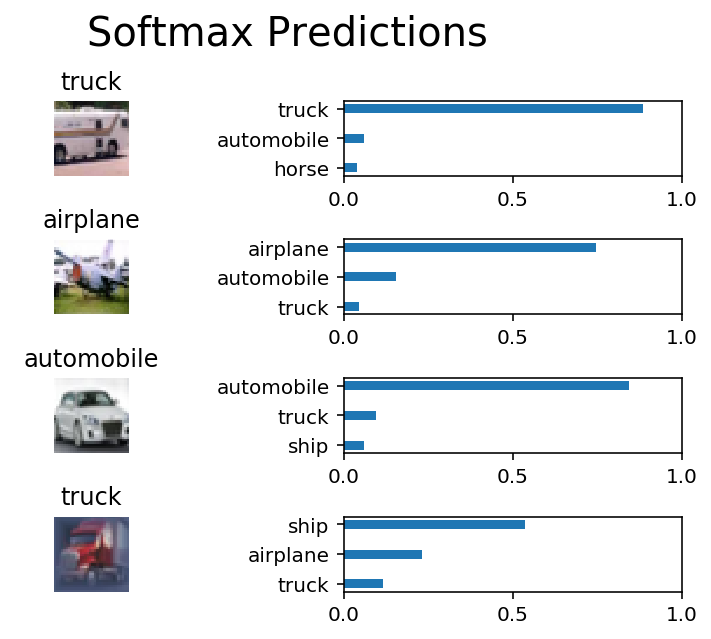

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.